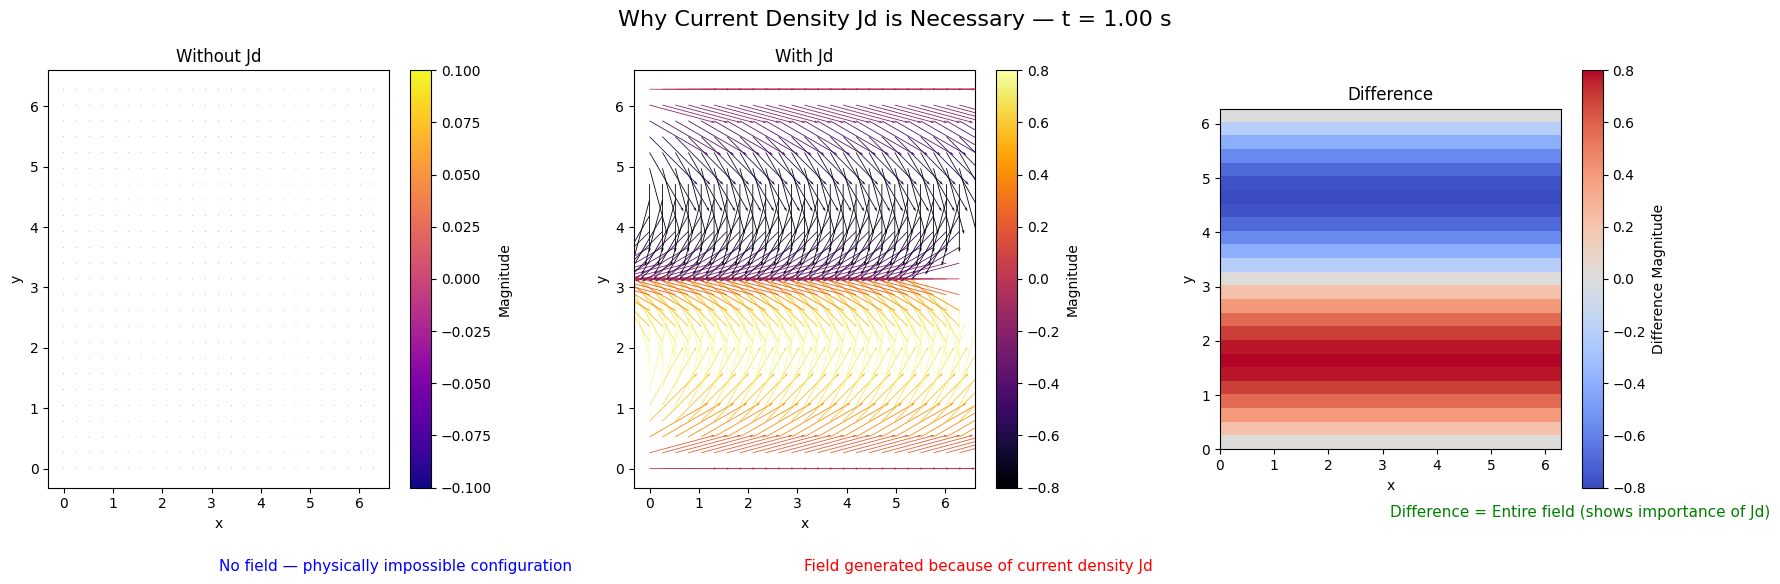

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2*np.pi, 25)
y = np.linspace(0, 2*np.pi, 25)
X, Y = np.meshgrid(x, y)


t = 1.0

E_no_Jd_mag = np.zeros_like(X)
E_no_Jd_dir_x = np.zeros_like(X)
E_no_Jd_dir_y = np.zeros_like(X)

Jd = 0.8 * np.sin(Y)
E_with_Jd_mag = Jd
E_with_Jd_dir_x = np.cos(Y)
E_with_Jd_dir_y = np.sin(Y)


Diff = E_with_Jd_mag - E_no_Jd_mag


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


q1 = axes[0].quiver(X, Y, E_no_Jd_dir_x, E_no_Jd_dir_y,
                     E_no_Jd_mag, cmap='plasma', scale=5)
axes[0].set_title("Without Jd")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].text(0.5, -0.2, "No field — physically impossible configuration",
             transform=axes[0].transAxes, fontsize=11, color='blue')


q2 = axes[1].quiver(X, Y, E_with_Jd_dir_x, E_with_Jd_dir_y,
                     E_with_Jd_mag, cmap='inferno', scale=5)
axes[1].set_title("With Jd")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].text(0.5, -0.2, "Field generated because of current density Jd",
             transform=axes[1].transAxes, fontsize=11, color='red')


im3 = axes[2].imshow(Diff, extent=(0, 2*np.pi, 0, 2*np.pi),
                      origin='lower', cmap='coolwarm')
axes[2].set_title("Difference")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")
axes[2].text(0.5, -0.2, "Difference = Entire field (shows importance of Jd)",
             transform=axes[2].transAxes, fontsize=11, color='green')

# Colorbars
fig.colorbar(q1, ax=axes[0], label="Magnitude")
fig.colorbar(q2, ax=axes[1], label="Magnitude")
fig.colorbar(im3, ax=axes[2], label="Difference Magnitude")

plt.suptitle(f"Why Current Density Jd is Necessary — t = {t:.2f} s", fontsize=16)
plt.tight_layout()
plt.show()
